# Korrelációk az adatok között  
Az alábbiakban azt vizsgáljuk meg, hogy az egyes országokban az intézkedések, az országra jellemző tulajdonságok mennyire befolyásolták egymást. Azaz azt akarjuk közelebbről szemügyre venni, hogy az egyes adatok között milyen összefüggés állapítható meg.

In [1]:
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
def adatcsv(start_date,end_date,countries,delete_columns=[]):
    '''
    beolvassa a csv fájlt és csinál belőle egy pandas adatszerkezetet,

    start_date, end_date stringek yyyy-mm-dd alakban,

    countries egy string lista azon országokból, amiket meg akarunk tartani,
    
    delete_columns string lista azon oszlopokról, amiket ki akarunk törölni
    '''  
    df = pd.read_csv('owid-covid-data.csv')                
    df = df[df["iso_code"].isin(countries)]
    df = df[(df["date"]>=start_date) & (df["date"]<=end_date)]
    df = df.drop(delete_columns, axis=1)

    return df

Továbbra is az EU országait tekintjük.

In [3]:
eu_members= [
    "AUT",  
    "BEL",  
    "BGR",  
    "CYP",  
    "CZE",  
    "DEU",  
    "DNK",  
    "EST",  
    "ESP",  
    "FIN",  
    "FRA",  
    "GRC",  
    "HRV",  
    "HUN",  
    "IRL",  
    "ITA",  
    "LTU",  
    "LUX",  
    "LVA",  
    "MLT",  
    "NLD",  
    "POL",  
    "PRT",  
    "ROU",  
    "SWE",  
    "SVN",  
    "SVK",  
]

Persze igyekszünk azokat az adatokat kiemelni, amelyekre sejtjük, hogy releváns hatással lehetettek a járvány alakulására, vagy az egyes szempontoknál fontos kimenettel bírtak. (Például: lehet, hogy egy adott korosztályban a vakcinálások kevésbé voltak hatékonyak)

In [4]:
eu=adatcsv("2020-02-15","2021-12-31",eu_members,["extreme_poverty","continent","location","date","new_cases","handwashing_facilities","total_boosters","total_tests","new_tests","tests_units","tests_per_case","positive_rate","new_deaths","hosp_patients","reproduction_rate","icu_patients","icu_patients_per_million","hosp_patients_per_million","weekly_icu_admissions","weekly_icu_admissions_per_million","weekly_hosp_admissions","weekly_hosp_admissions_per_million","total_tests_per_thousand","new_tests_per_thousand","new_tests_smoothed_per_thousand","new_vaccinations","total_vaccinations_per_hundred","people_vaccinated_per_hundred","people_fully_vaccinated_per_hundred","total_boosters_per_hundred","new_people_vaccinated_smoothed_per_hundred","stringency_index","cardiovasc_death_rate","diabetes_prevalence","excess_mortality_cumulative_absolute","excess_mortality_cumulative","excess_mortality","excess_mortality_cumulative_per_million"])
eu
# alapból 2020-02-15 2022-12-31-ig

,iso_code,total_cases,total_deaths,total_vaccinations,people_vaccinated,people_fully_vaccinated,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index,population
21149,AUT,NaN,NaN,NaN,NaN,NaN,106.749,44.4,19.202,13.748,45436.686,28.4,30.9,7.37,81.54,0.922,8939617
21150,AUT,NaN,NaN,NaN,NaN,NaN,106.749,44.4,19.202,13.748,45436.686,28.4,30.9,7.37,81.54,0.922,8939617
21151,AUT,NaN,NaN,NaN,NaN,NaN,106.749,44.4,19.202,13.748,45436.686,28.4,30.9,7.37,81.54,0.922,8939617
21152,AUT,NaN,NaN,NaN,NaN,NaN,106.749,44.4,19.202,13.748,45436.686,28.4,30.9,7.37,81.54,0.922,8939617
21153,AUT,NaN,NaN,NaN,NaN,NaN,106.749,44.4,19.202,13.748,45436.686,28.4,30.9,7.37,81.54,0.922,8939617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327360,SWE,1286608.0,15302.0,NaN,NaN,NaN,24.718,41.0,19.985,13.433,46949.283,18.8,18.9,2.22,82.80,0.945,10549349
327361,SWE,1286608.0,15302.0,NaN,NaN,NaN,24.718,41.0,19.985,13.433,46949.283,18.8,18.9,2.22,82.80,0.945,10549349
327362,SWE,1286608.0,15302.0,NaN,NaN,NaN,24.718,41.0,19.985,13.433,46949.283,18.8,18.9,2.22,82.80,0.945,10549349
327363,SWE,1286608.0,15302.0,NaN,NaN,NaN,24.718,41.0,19.985,13.433,46949.283,18.8,18.9,2.22,82.80,0.945,10549349


In [5]:
last_indexes=[]
for country in eu_members:
    last_occurrence_index = eu[eu['iso_code'] == country].index[-1]
    last_indexes.append(last_occurrence_index)
last_indexes
eu.index

Index([ 21149,  21150,  21151,  21152,  21153,  21154,  21155,  21156,  21157,
        21158,
       ...
       327355, 327356, 327357, 327358, 327359, 327360, 327361, 327362, 327363,
       327364],
      dtype='int64', length=18522)

In [6]:
eu.drop(index=[i for i in eu.index if i not in last_indexes], inplace=True)
eu = eu.drop(["iso_code"], axis=1)

In [7]:
eu

,total_cases,total_deaths,total_vaccinations,people_vaccinated,people_fully_vaccinated,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index,population
21834,1252088.0,16587.0,16677400.0,6707225.0,6315016.0,106.749,44.4,19.202,13.748,45436.686,28.4,30.9,7.370,81.54,0.922,8939617
32396,2048110.0,28192.0,21730351.0,8939770.0,8828993.0,375.564,41.8,18.571,12.849,42658.576,25.1,31.4,5.640,81.63,0.931,11655923
50468,733882.0,30528.0,3700660.0,NaN,1914910.0,65.180,44.7,20.801,13.272,18563.307,30.1,44.4,7.454,75.05,0.816,6781955
77612,693102.0,12279.0,4729751.0,2259393.0,1953540.0,73.726,44.0,19.724,13.053,22669.797,34.3,39.9,5.540,78.49,0.851,4030361
82130,149848.0,637.0,NaN,NaN,NaN,127.657,37.3,13.416,8.563,32415.132,19.6,52.7,3.400,80.98,0.887,896007
83636,2486451.0,35988.0,15496235.0,6829206.0,6660564.0,137.176,43.3,19.027,11.580,32605.906,30.5,38.3,6.630,79.38,0.900,10493990
86668,697563.0,3197.0,11882638.0,4693570.0,4507799.0,136.520,42.3,19.677,12.325,46682.515,19.3,18.8,2.500,80.90,0.940,5882259
101581,226809.0,1828.0,1808856.0,842114.0,827739.0,31.033,42.7,19.452,13.491,29481.252,24.5,39.3,4.690,78.74,0.892,1326064
113675,322835.0,1836.0,9616819.0,NaN,NaN,18.136,42.8,21.228,13.264,40585.721,18.3,22.6,3.280,81.91,0.938,5540745
115181,8709926.0,124165.0,124246736.0,53230434.0,49647368.0,122.578,42.0,19.718,13.079,38605.671,30.1,35.6,5.980,82.66,0.901,67813000


### Korreláció
Mi is az a korrelációs együttható? Lényegében egy olyan mérőszám, ami azt hivatott megmutatni, hogy két mennyiség között van-e összefüggés, illetve ha van, akkor milyen mértékű. (Persze, ha $R$ közel van 1-hez, akkor szignifikáns az összefüggés, ha -1-hez, akkor nem.)
    $$R = \frac{E(XY)-E(X)E(Y)}{D(X)D(Y)} \in [-1,1]$$


Az alábbiakban meghatároztunk egy korrelációs mátrixot, ami az általunk választott szempontok halmazából minden Descartes-szorzat párosra kiszámítja a fenti képlet alapján a korrelációt.

In [8]:
corr_matrix = eu.corr()

Talán a leghatásosabb vizualizációs eszköz a hőtérkép. A mi esetünkben annál nagyobb a korrelációs együttható két adatra, ha az adott rubrika piroshoz közeli árnyalatot vesz fel, illetve anál kisebb, ha kékhez közeli árnyalatot vesz fel.

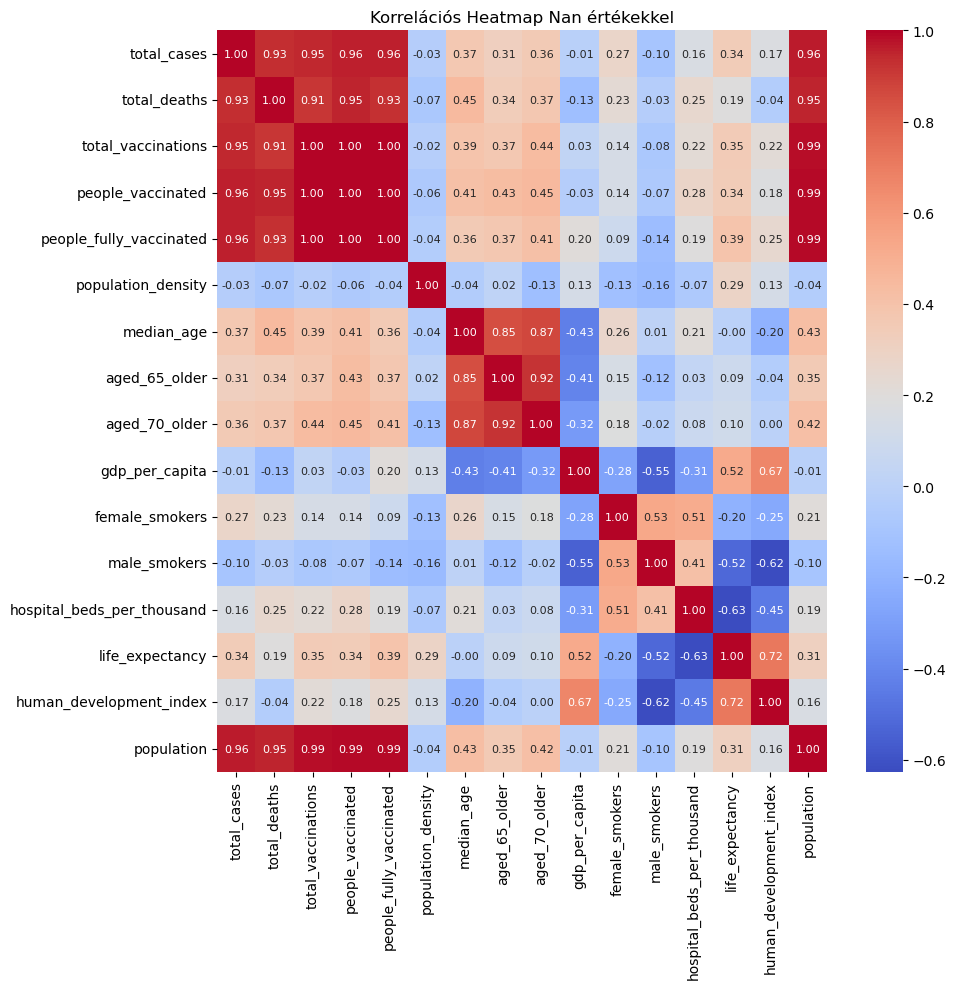

In [13]:
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 8})
plt.title('Korrelációs Heatmap Nan értékekkel')
'''for i in range(len(corr_matrix)):
    for j in range(len(corr_matrix.columns)):
       text = f'{corr_matrix.iloc[i, j]:.2f}'
       plt.text(j + 0.5, i + 0.5, text, ha='center', va='center', color='black', fontsize=10)'''
plt.tight_layout()
plt.show()

Azt láttuk, hogy a NaN adatok is befolyáslták az eredményünket, így érdemes volt azt az adathalmazt is tekntenünk, amelyből ezeket elhagytuk.

In [14]:
indexes=eu.index
indexes

Index([ 21834,  32396,  50468,  77612,  82130,  83636,  86668, 101581, 113675,
       115181, 124217, 128735, 149836, 158892, 163410, 181502, 190538, 195095,
       204946, 233580, 270337, 271843, 277867, 309292, 310798, 321340, 327364],
      dtype='int64')

In [15]:
eu1=eu.dropna()

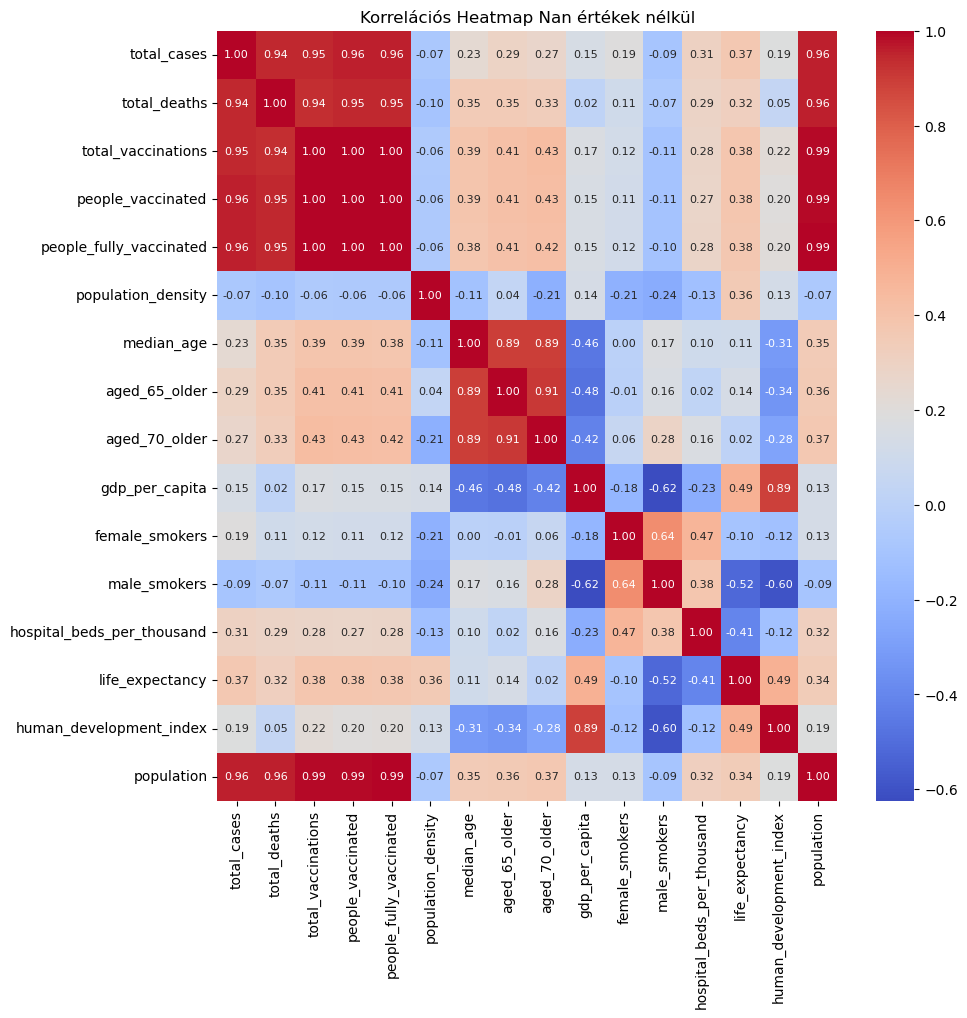

In [16]:
corr1=eu1.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr1, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 8})
plt.title('Korrelációs Heatmap Nan értékek nélkül')
plt.show()

Fontos kérdés, hogy ha eltekintünk azoktól a soroktól, amelyek túl sok NaN adatot tartalmaznak, akkor mely országok maradnak hátra. (Így végső soron nem az EU országairól kapunk egy kollektív képet, hanem az alábbiakban felsorolt néhány országról)

In [17]:
indexes1=eu1.index

In [18]:
data=pd.read_csv("owid-covid-data.csv")
for id1 in indexes1:
    for id2 in indexes:
        if id1==id2: 
            print(data["location"][id1])

Austria
Belgium
Croatia
Czechia
Denmark
Estonia
France
Germany
Greece
Ireland
Italy
Latvia
Lithuania
Malta
Netherlands
Poland
Portugal
Slovenia


Persze a korábbi ábrában egyszerre szerepel minden vizsgálandó szempont. Ha két konkrét adat összefüggésére vagyunk kiváncsiak, akkor az alábbiakban kiválaszthatjuk melyek ezek és ismét gyönyörködhetünk a színes hőtérképekben.

In [19]:
import ipywidgets as widgets
from IPython.display import display, clear_output

categorial_columns = [column for column in eu.columns]
categorial_rows = [row for row in eu.columns]

dd1 = widgets.Dropdown(options = categorial_columns, description = 'column')
dd2 = widgets.Dropdown(options = categorial_rows, description = 'row')

cmap=sns.color_palette("blend:#7AB,#EDA")

def draw_part(column, row):
    corr=eu1[[column, row]].corr()
    p = sns.heatmap(corr, cmap=cmap, fmt=".2f")
    
out = widgets.interactive_output(draw_part, {'column': dd1, 'row':dd2})
ui = widgets.HBox([dd1, dd2])

display(ui, out)

Output()